In [1]:
import pandas as pd
from statsmodels.stats import diagnostic
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Data for 2019 extension

## World Values Survey

In [2]:
df = pd.read_csv(
    'WVS_Cross-National_Wave_7_csv_v5_0.csv')
df.columns

/var/folders/rm/7_ymgfb97mbb78p4rhq92vww0000gn/T/ipykernel_53490/325629717.py:1: DtypeWarning: Columns (345,347,349,574,575,576) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(


Index(['version', 'doi', 'A_WAVE', 'A_YEAR', 'A_STUDY', 'B_COUNTRY',
       'B_COUNTRY_ALPHA', 'C_COW_NUM', 'C_COW_ALPHA', 'D_INTERVIEW',
       ...
       'WVS_Polmistrust_PartyVoter', 'WVS_LR_MedianVoter',
       'WVS_LibCon_MedianVoter', 'v2psbars', 'v2psorgs', 'v2psprbrch',
       'v2psprlnks', 'v2psplats', 'v2xnp_client', 'v2xps_party'],
      dtype='object', length=606)

In [3]:
unem_columns = [column for column in df.columns if 'unem' in column]
unem_columns

['unemployfem', 'unemploymale', 'unemploytotal']

In [4]:
unem_columns.append('B_COUNTRY_ALPHA')

In [5]:
df[unem_columns][df['B_COUNTRY_ALPHA']=='AUS'].value_counts()

unemployfem  unemploymale  unemploytotal  B_COUNTRY_ALPHA
5.33         5.22          5.27           AUS                1813
dtype: int64

## Paper

In [6]:
df_cross_country = pd.read_stata('crosscountry_dataset.dta')
df_cross_country

,isocode,flfp2000,female_ownership,women_politics,plow,agricultural_suitability,tropical_climate,large_animals,political_hierarchies,economic_complexity,...,terrslope2,soil2,avg_temp2,avg_precip2,slope_soil,slope_temp,slope_precip,soil_temp,soil_precip,temp_precip
0,ABW,NaN,NaN,NaN,0.000000,0.829847,1.000000,1.000000,4.000000,7.000000,...,23.248068,0.796877,694.377380,9291.514648,4.304165,127.054840,464.768494,23.523033,86.047607,2540.042725
1,AFG,31.3,2.8,NaN,0.999969,0.229267,0.785295,1.000000,3.633688,6.199330,...,623.563904,0.068421,74.482773,538.041870,6.531851,215.510483,579.226624,2.257479,6.067417,200.187042
2,AGO,75.2,56.6,16.0,0.000000,0.921061,1.000000,0.998896,2.720727,6.697217,...,358.600311,0.970410,418.034027,9126.774414,18.654472,387.178406,1809.105957,20.141113,94.110115,1953.279907
3,AIA,NaN,NaN,NaN,0.000000,0.829847,1.000000,1.000000,4.000000,7.000000,...,23.248068,0.796877,694.377380,9291.514648,4.304165,127.054840,464.768494,23.523033,86.047607,2540.042725
4,ALB,50.2,10.8,5.0,1.000000,0.555928,0.359318,1.000000,3.029723,5.035051,...,986.303772,0.609834,122.236977,6294.060547,24.525124,347.221527,2491.556885,8.633903,61.954281,877.135620
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,YUG,NaN,28.8,NaN,1.000000,0.775941,0.080989,1.000000,3.822862,7.444995,...,567.683655,0.759602,116.812553,4452.978027,20.765686,257.512268,1589.931641,9.419717,58.159191,721.223755
230,ZAF,44.3,22.6,30.0,0.540551,0.865508,0.901535,0.999999,3.550035,5.920460,...,594.206116,0.745225,312.183350,4103.467285,21.043222,430.698578,1561.507446,15.252764,55.299240,1131.827759
231,ZAR,55.5,38.9,NaN,0.000000,0.423659,1.000000,0.928739,2.383938,6.545618,...,104.809097,0.970129,546.375610,15426.306641,10.083570,239.301346,1271.541260,23.022926,122.333626,2903.197754
232,ZMB,62.1,37.2,10.0,0.000000,0.955900,1.000000,0.754301,2.390349,5.871349,...,139.062561,0.892828,442.156647,7636.923828,11.142666,247.966599,1030.538818,19.868818,82.573975,1837.584473


In [7]:
df_cross_country[df_cross_country['isocode'] == 'USA']

,isocode,flfp2000,female_ownership,women_politics,plow,agricultural_suitability,tropical_climate,large_animals,political_hierarchies,economic_complexity,...,terrslope2,soil2,avg_temp2,avg_precip2,slope_soil,slope_temp,slope_precip,soil_temp,soil_precip,temp_precip
217,USA,59.5,NaN,13.0,0.972528,0.855395,0.043982,0.994987,3.949898,7.927381,...,270.071136,0.944029,75.51651,7971.624512,15.967307,142.810471,1467.27832,8.443326,86.749306,775.8797


## World Bank (for all indicators)

In [8]:
df = pd.read_csv('data_table3.csv').set_index(['Country Name', 'Country Code'])

In [9]:
df

Series Name  \
Country Name                                     Country Code                                                      
Afghanistan                                      AFG           Labor force participation rate, female (% of f...   
                                                 AFG           Firms with female participation in ownership (...   
                                                 AFG           Proportion of seats held by women in national ...   
Albania                                          ALB           Labor force participation rate, female (% of f...   
                                                 ALB           Firms with female participation in ownership (...   
...                                                                                                          ...   
NaN                                              NaN                                                         NaN   
                                                 NaN                                                         NaN   
                                                 NaN                                                         NaN   
Data from database: World Development Indicators NaN                                                         NaN   
Last Updated: 12/22/2022                         NaN                                                         NaN   

                                                                     Series Code  \
Country Name                                     Country Code                      
Afghanistan                                      AFG           SL.TLF.ACTI.FE.ZS   
                                                 AFG              IC.FRM.FEMO.ZS   
                                                 AFG              SG.GEN.PARL.ZS   
Albania                                          ALB           SL.TLF.ACTI.FE.ZS   
                                                 ALB              IC.FRM.FEMO.ZS   
...                                                                          ...   
NaN                                              NaN                         NaN   
                                                 NaN                         NaN   
                                                 NaN                         NaN   
Data from database: World Development Indicators NaN                         NaN   
Last Updated: 12/22/2022                         NaN                         NaN   

                                                              1999 [YR1999]  \
Country Name                                     Country Code                 
Afghanistan                                      AFG                   15.4   
                                                 AFG                     ..   
                                                 AFG                     ..   
Albania                                          ALB                  58.87   
                                                 ALB                     ..   
...                                                                     ...   
NaN                                              NaN                    NaN   
                                                 NaN                    NaN   
                                                 NaN                    NaN   
Data from database: World Development Indicators NaN                    NaN   
Last Updated: 12/22/2022                         NaN                    NaN   

                                                              2000 [YR2000]  \
Country Name                                     Country Code                 
Afghanistan                                      AFG                  15.35   
                                                 AFG                     ..   
                                                 AFG                     ..   
Albania                                          ALB                  57.89 

### Female ownership 2010-2019, replace missing values with previous years

In [10]:
female_ownership2010_to_2019 = df[df['Series Name'] == 'Firms with female participation in ownership (% of firms)'][['2003 [YR2003]', '2004 [YR2004]', '2005 [YR2005]', '2006 [YR2006]', '2007 [YR2007]', '2008 [YR2008]',
                                                                                                                     '2009 [YR2009]', '2010 [YR2010]', '2011 [YR2011]', '2012 [YR2012]', '2013 [YR2013]', '2014 [YR2014]', '2015 [YR2015]', '2016 [YR2016]', '2017 [YR2017]', '2018 [YR2018]', '2019 [YR2019]']].reset_index()
female_ownership2010_to_2019.replace('..', np.nan, inplace=True)
female_ownership2010_to_2019.iloc[:, 2:].astype(float)
female_ownership2010_to_2019


,Country Name,Country Code,2003 [YR2003],2004 [YR2004],2005 [YR2005],2006 [YR2006],2007 [YR2007],2008 [YR2008],2009 [YR2009],2010 [YR2010],2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019]
0,Afghanistan,AFG,NaN,NaN,NaN,NaN,NaN,2.8,NaN,NaN,NaN,NaN,NaN,2.2,NaN,NaN,NaN,NaN,NaN
1,Albania,ALB,NaN,NaN,12.8,NaN,10.8,NaN,NaN,NaN,NaN,NaN,13.1,NaN,NaN,NaN,NaN,NaN,20.7
2,Algeria,DZA,NaN,NaN,NaN,NaN,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,American Samoa,ASM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Andorra,AND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,Virgin Islands (U.S.),VIR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
213,West Bank and Gaza,PSE,NaN,NaN,NaN,18,NaN,NaN,NaN,NaN,NaN,NaN,10.7,NaN,NaN,NaN,NaN,NaN,6
214,"Yemen, Rep.",YEM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.4,NaN,NaN,6.6,NaN,NaN,NaN,NaN,NaN,NaN
215,Zambia,ZMB,NaN,NaN,NaN,NaN,37.2,NaN,NaN,NaN,NaN,NaN,43.7,NaN,NaN,NaN,NaN,NaN,41.5


In [11]:
for col in range(-2, -11, -1):
    female_ownership2010_to_2019['2019 [YR2019]'] = female_ownership2010_to_2019['2019 [YR2019]'].fillna(
        female_ownership2010_to_2019.iloc[:, col])
    print('values not nan', female_ownership2010_to_2019['2019 [YR2019]'].notna(
    ).sum(), 'year 2019 -', female_ownership2010_to_2019.iloc[:, col].name)


values not nan 47 year 2019 - 2018 [YR2018]
values not nan 58 year 2019 - 2017 [YR2017]
values not nan 75 year 2019 - 2016 [YR2016]
values not nan 83 year 2019 - 2015 [YR2015]
values not nan 94 year 2019 - 2014 [YR2014]
values not nan 107 year 2019 - 2013 [YR2013]
values not nan 108 year 2019 - 2012 [YR2012]
values not nan 111 year 2019 - 2011 [YR2011]
values not nan 130 year 2019 - 2010 [YR2010]


In [12]:
female_ownership2010_to_2019 = female_ownership2010_to_2019[['Country Name', 'Country Code', '2019 [YR2019]']]
female_ownership2010_to_2019

,Country Name,Country Code,2019 [YR2019]
0,Afghanistan,AFG,2.2
1,Albania,ALB,20.7
2,Algeria,DZA,NaN
3,American Samoa,ASM,NaN
4,Andorra,AND,NaN
...,...,...,...
212,Virgin Islands (U.S.),VIR,NaN
213,West Bank and Gaza,PSE,6
214,"Yemen, Rep.",YEM,6.6
215,Zambia,ZMB,41.5


### All indicators

In [13]:
flfp2019 = df[df['Series Name'] == 'Labor force participation rate, female (% of female population ages 15-64) (modeled ILO estimate)']['2019 [YR2019]'].reset_index()
women_politics2019 = df[df['Series Name'] == 'Proportion of seats held by women in national parliaments (%)']['2019 [YR2019]'].reset_index()

In [14]:
[[flfp2019,women_politics2019]]

[[              Country Name Country Code 2019 [YR2019]
  0              Afghanistan          AFG         22.74
  1                  Albania          ALB         61.46
  2                  Algeria          DZA          18.7
  3           American Samoa          ASM            ..
  4                  Andorra          AND            ..
  ..                     ...          ...           ...
  212  Virgin Islands (U.S.)          VIR         67.36
  213     West Bank and Gaza          PSE         19.15
  214            Yemen, Rep.          YEM          6.29
  215                 Zambia          ZMB         71.29
  216               Zimbabwe          ZWE         79.11
  
  [217 rows x 3 columns],
                Country Name Country Code      2019 [YR2019]
  0              Afghanistan          AFG   27.8688524590164
  1                  Albania          ALB   29.5081967213115
  2                  Algeria          DZA   25.7575757575758
  3           American Samoa          ASM              

## Paper + WorldBank datasets for 2019

In [15]:
df_cross_country2019 = pd.merge(
    df_cross_country, flfp2019, left_on='isocode', right_on='Country Code', how='left'
).drop(['Country Code', 'Country Name'], axis=1
       ).rename(columns={'2019 [YR2019]': 'flfp2019'}
                ).merge(women_politics2019, left_on='isocode', right_on='Country Code', how='left'
                        ).drop(['Country Code', 'Country Name'], axis=1
                               ).rename(columns={'2019 [YR2019]': 'women_politics2019'}
                                        ).merge(female_ownership2010_to_2019, left_on='isocode', right_on='Country Code', how='left'
                                                ).drop(['Country Code', 'Country Name'], axis=1
                                                       ).rename(columns={'2019 [YR2019]': 'female_ownership2010_to_2019'})

In [16]:
df_cross_country2019[['flfp2019', 'women_politics2019', 'female_ownership2010_to_2019']] = df_cross_country2019[['flfp2019', 'women_politics2019', 'female_ownership2010_to_2019']
                                                                                                        ].replace('..', np.nan).astype(float)

In [17]:
df_cross_country2019

,isocode,flfp2000,female_ownership,women_politics,plow,agricultural_suitability,tropical_climate,large_animals,political_hierarchies,economic_complexity,...,avg_precip2,slope_soil,slope_temp,slope_precip,soil_temp,soil_precip,temp_precip,flfp2019,women_politics2019,female_ownership2010_to_2019
0,ABW,NaN,NaN,NaN,0.000000,0.829847,1.000000,1.000000,4.000000,7.000000,...,9291.514648,4.304165,127.054840,464.768494,23.523033,86.047607,2540.042725,NaN,NaN,NaN
1,AFG,31.3,2.8,NaN,0.999969,0.229267,0.785295,1.000000,3.633688,6.199330,...,538.041870,6.531851,215.510483,579.226624,2.257479,6.067417,200.187042,22.74,27.868852,2.2
2,AGO,75.2,56.6,16.0,0.000000,0.921061,1.000000,0.998896,2.720727,6.697217,...,9126.774414,18.654472,387.178406,1809.105957,20.141113,94.110115,1953.279907,76.88,30.000000,56.6
3,AIA,NaN,NaN,NaN,0.000000,0.829847,1.000000,1.000000,4.000000,7.000000,...,9291.514648,4.304165,127.054840,464.768494,23.523033,86.047607,2540.042725,NaN,NaN,NaN
4,ALB,50.2,10.8,5.0,1.000000,0.555928,0.359318,1.000000,3.029723,5.035051,...,6294.060547,24.525124,347.221527,2491.556885,8.633903,61.954281,877.135620,61.46,29.508197,20.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,YUG,NaN,28.8,NaN,1.000000,0.775941,0.080989,1.000000,3.822862,7.444995,...,4452.978027,20.765686,257.512268,1589.931641,9.419717,58.159191,721.223755,NaN,NaN,NaN
230,ZAF,44.3,22.6,30.0,0.540551,0.865508,0.901535,0.999999,3.550035,5.920460,...,4103.467285,21.043222,430.698578,1561.507446,15.252764,55.299240,1131.827759,54.07,46.347607,NaN
231,ZAR,55.5,38.9,NaN,0.000000,0.423659,1.000000,0.928739,2.383938,6.545618,...,15426.306641,10.083570,239.301346,1271.541260,23.022926,122.333626,2903.197754,NaN,NaN,NaN
232,ZMB,62.1,37.2,10.0,0.000000,0.955900,1.000000,0.754301,2.390349,5.871349,...,7636.923828,11.142666,247.966599,1030.538818,19.868818,82.573975,1837.584473,71.29,17.964072,41.5


## AES

In [18]:
# compute the average effect size for the outcome columns flfp2000, female_ownership and women_politics
# for each country in the cross-country dataset
df_cross_country['aes'] = pd.concat([df_cross_country['flfp2000'] /
                                     df_cross_country[df_cross_country.plow == 0]['flfp2000'].std(
),
    df_cross_country['female_ownership'] /
    df_cross_country[df_cross_country.plow == 0]['female_ownership'].std(
),
    df_cross_country['women_politics'] /
    df_cross_country[df_cross_country.plow == 0]['women_politics'].std()
],
    axis=1).dropna(how='any').mean(axis=1)  # dropped rows with any missing values, to match the stata code
# Still coudln't match the standard errors (they might be calculated with a different regression
# on other data


df_cross_country2019['aes2019'] = pd.concat([df_cross_country2019['flfp2019'] /
                                         df_cross_country2019[df_cross_country2019.plow == 0]['flfp2019'].std(
),
    df_cross_country2019['female_ownership2010_to_2019'] /
    df_cross_country2019[df_cross_country2019.plow == 0]['female_ownership2010_to_2019'].std(
),
    df_cross_country2019['women_politics2019'] /
    df_cross_country2019[df_cross_country2019.plow ==
                         0]['women_politics2019'].std()
],
    axis=1).dropna(how='any').mean(axis=1)

# Data for minutes spent at home extension

**Indicator**

Proportion of time spent on unpaid domestic and care work, female (% of 24 hour day)

In [19]:
df_f_unpaid = pd.read_excel('female_unpaid_work.xls').drop(['Indicator Name', 'Indicator Code'], axis=1).iloc[:,:-2]
df_f_unpaid

,Country Name,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Aruba,ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Africa Western and Central,AFW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Angola,AGO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,XKX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
262,"Yemen, Rep.",YEM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
263,South Africa,ZAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,15.55556,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
264,Zambia,ZMB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
df_f_unpaid.iloc[:, 2:] = df_f_unpaid.iloc[:, 2:].astype(float)
df_f_unpaid

,Country Name,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Aruba,ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Africa Western and Central,AFW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Angola,AGO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,XKX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
262,"Yemen, Rep.",YEM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
263,South Africa,ZAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,15.55556,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
264,Zambia,ZMB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
# lots of no values at all for some countries (from the 1960s) values
df_f_unpaid.set_index(['Country Name','Country Code']).T.count().value_counts()

0     177
1      44
2      29
3       6
4       6
5       2
6       1
17      1
dtype: int64

In [22]:
for col in range(-2, -21, -1):
    df_f_unpaid['2019'] = df_f_unpaid['2019'].fillna(
        df_f_unpaid.iloc[:, col])
    print('values not nan', df_f_unpaid['2019'].notna(
    ).sum(), 'year 2019 -', df_f_unpaid.iloc[:, col].name)

df_f_unpaid2000_to_2019 = df_f_unpaid[['Country Name', 'Country Code', '2019']]
df_f_unpaid2000_to_2019

values not nan 7 year 2019 - 2018
values not nan 13 year 2019 - 2017
values not nan 20 year 2019 - 2016
values not nan 31 year 2019 - 2015
values not nan 37 year 2019 - 2014
values not nan 46 year 2019 - 2013
values not nan 52 year 2019 - 2012
values not nan 56 year 2019 - 2011
values not nan 66 year 2019 - 2010
values not nan 71 year 2019 - 2009
values not nan 74 year 2019 - 2008
values not nan 76 year 2019 - 2007
values not nan 78 year 2019 - 2006
values not nan 80 year 2019 - 2005
values not nan 81 year 2019 - 2004
values not nan 86 year 2019 - 2003
values not nan 87 year 2019 - 2002
values not nan 89 year 2019 - 2001
values not nan 89 year 2019 - 2000


,Country Name,Country Code,2019
0,Aruba,ABW,NaN
1,Africa Eastern and Southern,AFE,NaN
2,Afghanistan,AFG,NaN
3,Africa Western and Central,AFW,NaN
4,Angola,AGO,NaN
...,...,...,...
261,Kosovo,XKX,NaN
262,"Yemen, Rep.",YEM,NaN
263,South Africa,ZAF,15.55556
264,Zambia,ZMB,NaN


## Data for number of children

In [23]:
df_fertility2019 = pd.read_csv('fertility_rate.csv')[['Country Name', 'Country Code','2019']]
df_fertility2019

,Country Name,Country Code,2019
0,Aruba,ABW,1.486000
1,Africa Eastern and Southern,AFE,4.482899
2,Afghanistan,AFG,4.870000
3,Africa Western and Central,AFW,5.118932
4,Angola,AGO,5.442000
...,...,...,...
261,Kosovo,XKX,1.546000
262,"Yemen, Rep.",YEM,3.963000
263,South Africa,ZAF,2.475000
264,Zambia,ZMB,4.451000


## Paper + Minutes spent at home data

In [24]:
df_cross_country_unpaid = df_cross_country.merge(
    df_f_unpaid2000_to_2019, left_on='isocode', right_on='Country Code', how='left'
    ).drop(['Country Code', 'Country Name'], axis=1
           ).rename(columns={'2019': 'f_unpaidwk2000_to_2019'}).merge(df_fertility2019, left_on='isocode', right_on='Country Code', how='left').drop(['Country Code', 'Country Name'], axis=1).rename(columns={'2019': 'fertility2019'})

# Regression Models

## Table 3, Paper

In [25]:
mod = smf.ols(formula='flfp2000 ~  plow + agricultural_suitability + tropical_climate + large_animals + political_hierarchies + economic_complexity', data=df_cross_country)
res = mod.fit(cov_type='HC1')
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:               flfp2000   R-squared:                       0.222
Model:                            OLS   Adj. R-squared:                  0.195
Method:                 Least Squares   F-statistic:                     7.306
Date:                Wed, 25 Jan 2023   Prob (F-statistic):           5.85e-07
Time:                        14:17:02   Log-Likelihood:                -714.44
No. Observations:                 177   AIC:                             1443.
Df Residuals:                     170   BIC:                             1465.
Df Model:                           6                                         
Covariance Type:                  HC1                                         
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

In [26]:
mod = smf.ols(formula='female_ownership ~  plow + agricultural_suitability + tropical_climate + large_animals + political_hierarchies + economic_complexity', data=df_cross_country)
res = mod.fit(cov_type='HC1')
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:       female_ownership   R-squared:                       0.179
Model:                            OLS   Adj. R-squared:                  0.138
Method:                 Least Squares   F-statistic:                     4.871
Date:                Wed, 25 Jan 2023   Prob (F-statistic):           0.000172
Time:                        14:17:02   Log-Likelihood:                -517.04
No. Observations:                 128   AIC:                             1048.
Df Residuals:                     121   BIC:                             1068.
Df Model:                           6                                         
Covariance Type:                  HC1                                         
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

In [27]:
mod = smf.ols(formula='women_politics ~  plow + agricultural_suitability + tropical_climate + large_animals + political_hierarchies + economic_complexity', data=df_cross_country)
res = mod.fit(cov_type='HC1')
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:         women_politics   R-squared:                       0.174
Model:                            OLS   Adj. R-squared:                  0.140
Method:                 Least Squares   F-statistic:                     4.415
Date:                Wed, 25 Jan 2023   Prob (F-statistic):           0.000393
Time:                        14:17:02   Log-Likelihood:                -538.96
No. Observations:                 153   AIC:                             1092.
Df Residuals:                     146   BIC:                             1113.
Df Model:                           6                                         
Covariance Type:                  HC1                                         
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

In [28]:
mod = smf.ols(formula='aes ~  plow + agricultural_suitability + tropical_climate + large_animals + political_hierarchies + economic_complexity', data=df_cross_country)
res = mod.fit(cov_type='HC1')
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                    aes   R-squared:                       0.254
Model:                            OLS   Adj. R-squared:                  0.209
Method:                 Least Squares   F-statistic:                     6.490
Date:                Wed, 25 Jan 2023   Prob (F-statistic):           8.32e-06
Time:                        14:17:02   Log-Likelihood:                -79.668
No. Observations:                 107   AIC:                             173.3
Df Residuals:                     100   BIC:                             192.0
Df Model:                           6                                         
Covariance Type:                  HC1                                         
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

### Continent fixed effects

In [29]:
mod = smf.ols(formula='flfp2000 ~  plow + agricultural_suitability + tropical_climate + large_animals + political_hierarchies + economic_complexity + C(continent)', data=df_cross_country)
res = mod.fit(cov_type='HC1')
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:               flfp2000   R-squared:                       0.284
Model:                            OLS   Adj. R-squared:                  0.237
Method:                 Least Squares   F-statistic:                     413.9
Date:                Wed, 25 Jan 2023   Prob (F-statistic):          2.28e-116
Time:                        14:17:02   Log-Likelihood:                -707.09
No. Observations:                 177   AIC:                             1438.
Df Residuals:                     165   BIC:                             1476.
Df Model:                          11                                         
Covariance Type:                  HC1                                         
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     

In [30]:
mod = smf.ols(formula='female_ownership ~  plow + agricultural_suitability + tropical_climate + large_animals + political_hierarchies + economic_complexity + C(continent)', data=df_cross_country)
res = mod.fit(cov_type='HC1')
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:       female_ownership   R-squared:                       0.233
Model:                            OLS   Adj. R-squared:                  0.161
Method:                 Least Squares   F-statistic:                     272.2
Date:                Wed, 25 Jan 2023   Prob (F-statistic):           6.52e-79
Time:                        14:17:02   Log-Likelihood:                -512.63
No. Observations:                 128   AIC:                             1049.
Df Residuals:                     116   BIC:                             1083.
Df Model:                          11                                         
Covariance Type:                  HC1                                         
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     

In [31]:
mod = smf.ols(formula='women_politics ~  plow + agricultural_suitability + tropical_climate + large_animals + political_hierarchies + economic_complexity + C(continent)', data=df_cross_country)
res = mod.fit(cov_type='HC1')
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:         women_politics   R-squared:                       0.202
Model:                            OLS   Adj. R-squared:                  0.140
Method:                 Least Squares   F-statistic:                     31.29
Date:                Wed, 25 Jan 2023   Prob (F-statistic):           6.57e-34
Time:                        14:17:02   Log-Likelihood:                -536.27
No. Observations:                 153   AIC:                             1097.
Df Residuals:                     141   BIC:                             1133.
Df Model:                          11                                         
Covariance Type:                  HC1                                         
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     

In [32]:
mod = smf.ols(formula='aes ~  plow + agricultural_suitability + tropical_climate + large_animals + political_hierarchies + economic_complexity + C(continent)', data=df_cross_country)
res = mod.fit(cov_type='HC1')
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                    aes   R-squared:                       0.300
Model:                            OLS   Adj. R-squared:                  0.219
Method:                 Least Squares   F-statistic:                     298.8
Date:                Wed, 25 Jan 2023   Prob (F-statistic):           8.71e-70
Time:                        14:17:02   Log-Likelihood:                -76.255
No. Observations:                 107   AIC:                             176.5
Df Residuals:                      95   BIC:                             208.6
Df Model:                          11                                         
Covariance Type:                  HC1                                         
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     

## Table 3, 2019 Extension

In [33]:
mod = smf.ols(formula='flfp2019 ~  plow + agricultural_suitability + tropical_climate + large_animals + political_hierarchies + economic_complexity', data=df_cross_country2019)
res = mod.fit(cov_type='HC1')
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:               flfp2019   R-squared:                       0.260
Model:                            OLS   Adj. R-squared:                  0.233
Method:                 Least Squares   F-statistic:                     9.045
Date:                Wed, 25 Jan 2023   Prob (F-statistic):           1.44e-08
Time:                        14:17:02   Log-Likelihood:                -718.92
No. Observations:                 175   AIC:                             1452.
Df Residuals:                     168   BIC:                             1474.
Df Model:                           6                                         
Covariance Type:                  HC1                                         
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

In [34]:
mod = smf.ols(formula='women_politics2019 ~  plow + agricultural_suitability + tropical_climate + large_animals + political_hierarchies + economic_complexity', data=df_cross_country2019)
res = mod.fit(cov_type='HC1')
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:     women_politics2019   R-squared:                       0.108
Model:                            OLS   Adj. R-squared:                  0.077
Method:                 Least Squares   F-statistic:                     4.099
Date:                Wed, 25 Jan 2023   Prob (F-statistic):           0.000714
Time:                        14:17:03   Log-Likelihood:                -694.48
No. Observations:                 180   AIC:                             1403.
Df Residuals:                     173   BIC:                             1425.
Df Model:                           6                                         
Covariance Type:                  HC1                                         
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

In [35]:
mod = smf.ols(formula='female_ownership2010_to_2019 ~  plow + agricultural_suitability + tropical_climate + large_animals + political_hierarchies + economic_complexity', data=df_cross_country2019)
res = mod.fit(cov_type='HC1')
print(res.summary())

                                 OLS Regression Results                                 
Dep. Variable:     female_ownership2010_to_2019   R-squared:                       0.154
Model:                                      OLS   Adj. R-squared:                  0.111
Method:                           Least Squares   F-statistic:                     3.980
Date:                          Wed, 25 Jan 2023   Prob (F-statistic):            0.00117
Time:                                  14:17:03   Log-Likelihood:                -508.61
No. Observations:                           124   AIC:                             1031.
Df Residuals:                               117   BIC:                             1051.
Df Model:                                     6                                         
Covariance Type:                            HC1                                         
                               coef    std err          z      P>|z|      [0.025      0.975]
-----------------

In [36]:
mod = smf.ols(formula='aes2019 ~  plow + agricultural_suitability + tropical_climate + large_animals + political_hierarchies + economic_complexity', data=df_cross_country2019)
res = mod.fit(cov_type='HC1')
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                aes2019   R-squared:                       0.214
Model:                            OLS   Adj. R-squared:                  0.172
Method:                 Least Squares   F-statistic:                     5.198
Date:                Wed, 25 Jan 2023   Prob (F-statistic):           9.42e-05
Time:                        14:17:03   Log-Likelihood:                -120.58
No. Observations:                 119   AIC:                             255.2
Df Residuals:                     112   BIC:                             274.6
Df Model:                           6                                         
Covariance Type:                  HC1                                         
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

### Continent Fixed effects

In [37]:
mod = smf.ols(formula='flfp2019 ~  plow + agricultural_suitability + tropical_climate + large_animals + political_hierarchies + economic_complexity + C(continent)', data=df_cross_country2019)
res = mod.fit(cov_type='HC1')
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:               flfp2019   R-squared:                       0.278
Model:                            OLS   Adj. R-squared:                  0.229
Method:                 Least Squares   F-statistic:                     453.6
Date:                Wed, 25 Jan 2023   Prob (F-statistic):          1.85e-118
Time:                        14:17:03   Log-Likelihood:                -716.71
No. Observations:                 175   AIC:                             1457.
Df Residuals:                     163   BIC:                             1495.
Df Model:                          11                                         
Covariance Type:                  HC1                                         
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     

In [38]:
mod = smf.ols(formula='women_politics2019 ~  plow + agricultural_suitability + tropical_climate + large_animals + political_hierarchies + economic_complexity + C(continent)', data=df_cross_country2019)
res = mod.fit(cov_type='HC1')
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:     women_politics2019   R-squared:                       0.192
Model:                            OLS   Adj. R-squared:                  0.139
Method:                 Least Squares   F-statistic:                     79.78
Date:                Wed, 25 Jan 2023   Prob (F-statistic):           7.74e-63
Time:                        14:17:03   Log-Likelihood:                -685.58
No. Observations:                 180   AIC:                             1395.
Df Residuals:                     168   BIC:                             1433.
Df Model:                          11                                         
Covariance Type:                  HC1                                         
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     

In [39]:
mod = smf.ols(formula='female_ownership2010_to_2019 ~  plow + agricultural_suitability + tropical_climate + large_animals + political_hierarchies + economic_complexity + C(continent)', data=df_cross_country2019)
res = mod.fit(cov_type='HC1')
print(res.summary())

                                 OLS Regression Results                                 
Dep. Variable:     female_ownership2010_to_2019   R-squared:                       0.265
Model:                                      OLS   Adj. R-squared:                  0.192
Method:                           Least Squares   F-statistic:                 3.153e+04
Date:                          Wed, 25 Jan 2023   Prob (F-statistic):          1.44e-191
Time:                                  14:17:03   Log-Likelihood:                -499.91
No. Observations:                           124   AIC:                             1024.
Df Residuals:                               112   BIC:                             1058.
Df Model:                                    11                                         
Covariance Type:                            HC1                                         
                                    coef    std err          z      P>|z|      [0.025      0.975]
------------

In [40]:
mod = smf.ols(formula='aes2019 ~  plow + agricultural_suitability + tropical_climate + large_animals + political_hierarchies + economic_complexity + C(continent)', data=df_cross_country2019)
res = mod.fit(cov_type='HC1')
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                aes2019   R-squared:                       0.283
Model:                            OLS   Adj. R-squared:                  0.209
Method:                 Least Squares   F-statistic:                     260.2
Date:                Wed, 25 Jan 2023   Prob (F-statistic):           2.79e-73
Time:                        14:17:03   Log-Likelihood:                -115.10
No. Observations:                 119   AIC:                             254.2
Df Residuals:                     107   BIC:                             287.6
Df Model:                          11                                         
Covariance Type:                  HC1                                         
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     

## Table 3, Extension - time spent at home

In [41]:
mod = smf.ols(formula='f_unpaidwk2000_to_2019 ~  plow + political_hierarchies + economic_complexity + fertility2019 + ln_income + ln_income_squared', data=df_cross_country_unpaid)
res = mod.fit(cov_type='HC1')
print(res.summary())

                              OLS Regression Results                              
Dep. Variable:     f_unpaidwk2000_to_2019   R-squared:                       0.256
Model:                                OLS   Adj. R-squared:                  0.198
Method:                     Least Squares   F-statistic:                     4.780
Date:                    Wed, 25 Jan 2023   Prob (F-statistic):           0.000349
Time:                            14:17:03   Log-Likelihood:                -214.71
No. Observations:                      83   AIC:                             443.4
Df Residuals:                          76   BIC:                             460.4
Df Model:                               6                                         
Covariance Type:                      HC1                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------

Results weak. Explanation: self selection problem with countries in time spent at home being high plow and high development.

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and pos

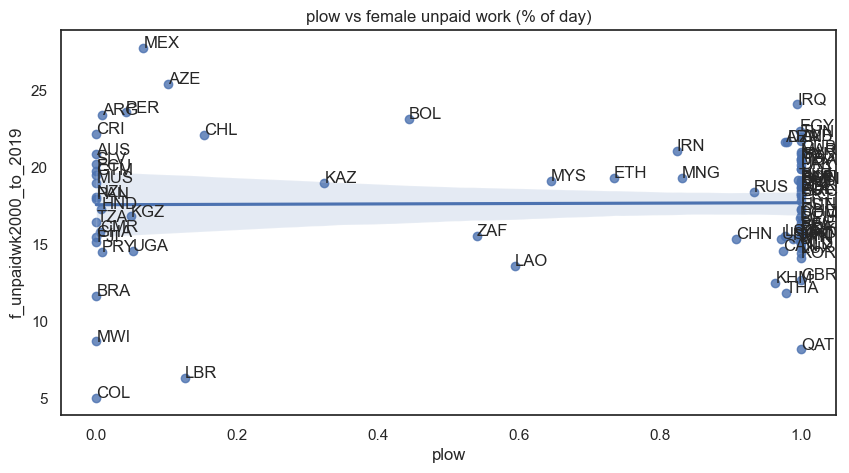

In [52]:
# plot line graph
sns.set(rc={'figure.figsize':(10,5)})
sns.set_style('white')
ax = sns.regplot(x='plow', y='f_unpaidwk2000_to_2019', data=df_cross_country_unpaid, marker='o') # , color='#965786')
ax.set(title='plow vs female unpaid work (% of day)')
# label points on the plot
for x, y, z in zip(df_cross_country_unpaid['plow'], df_cross_country_unpaid['f_unpaidwk2000_to_2019'], df_cross_country_unpaid['isocode']):
    # the position of the data label relative to the data point can be adjusted by adding/subtracting a value from the x &/ y coordinates
    plt.text(x = x, # x-coordinate position of data label
    y = y, # y-coordinate position of data label, adjusted to be 150 below the data point
    s = z) # data label, formatted to ignore decimals
    # color = 'purple') # set colour of line

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and pos

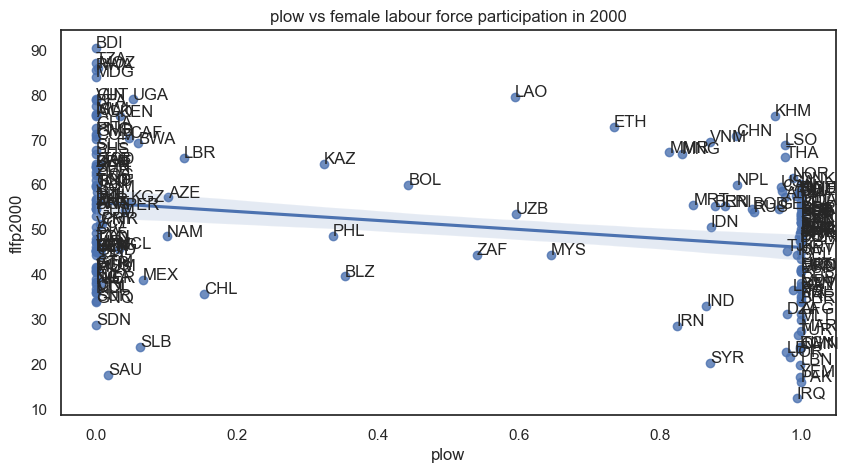

In [48]:
# plot line graph
sns.set(rc={'figure.figsize':(10,5)})
sns.set_style('white')
ax = sns.regplot(x='plow', y='flfp2000', data=df_cross_country_unpaid, marker='o') # , color='#965786')
ax.set(title='plow vs female labour force participation in 2000')
# label points on the plot
for x, y, z in zip(df_cross_country_unpaid['plow'], df_cross_country_unpaid['flfp2000'], df_cross_country_unpaid['isocode']):
    # the position of the data label relative to the data point can be adjusted by adding/subtracting a value from the x &/ y coordinates
    plt.text(x = x, # x-coordinate position of data label
    y = y, # y-coordinate position of data label, adjusted to be 150 below the data point
    s = z) # data label, formatted to ignore decimals
    # color = 'purple') # set colour of line